In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("customer_churn.csv")

In [3]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2932,7740-BTPUX,Male,1,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.60,6292.7,No
6504,6110-OHIHY,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,79.25,267.6,Yes
3211,4359-INNWN,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,337.9,No
6892,1545-ACTAS,Female,0,Yes,Yes,48,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),99.70,4977.2,No
4361,8680-CGLTP,Male,0,No,No,29,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,No


In [7]:
#checking for unique values 
for i in df:
    print(i , df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [8]:
df.dtypes["PaperlessBilling"]

dtype('O')

In [9]:
df.dtypes["MonthlyCharges"]

dtype('float64')

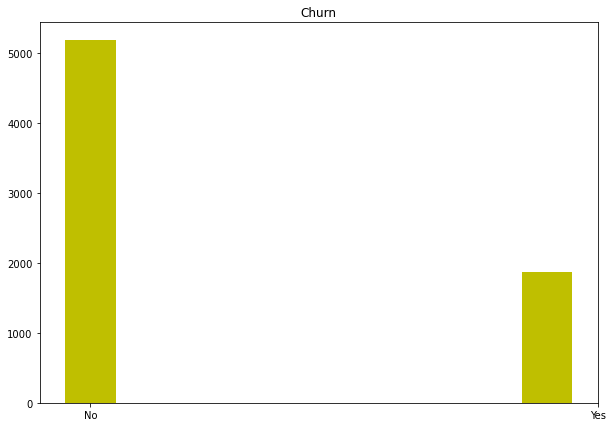

['No' 'Yes']


In [10]:
plt.figure(figsize=(10,7))
plt.title ("Churn")
plt.hist(df["Churn"] , color="y",align="left" )
plt.show()
print(df["Churn"].unique())

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#encoding all objct columns 

encode=["customerID",          
"gender",               
"Partner",              
"Dependents" ,          
"PhoneService" ,        
"MultipleLines" ,       
"InternetService",      
"OnlineSecurity"  ,     
"OnlineBackup" ,        
"DeviceProtection",     
'TechSupport',
"StreamingTV" ,         
"StreamingMovies" ,
'Contract'   ,         
'PaperlessBilling' ,    
"PaymentMethod" ,       
"TotalCharges",         
'Churn']        


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for val in encode:
    df[val]=le.fit_transform(df[val].astype(str))
    #as type describes that the data present are in str format
    
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [13]:
#checking for unique values 
for i in df:
    print(i , df[i].unique())

customerID [5375 3962 2564 ... 3367 5934 2226]
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [1 0 2]
InternetService [0 1 2]
OnlineSecurity [0 2 1]
OnlineBackup [2 0 1]
DeviceProtection [0 2 1]
TechSupport [0 2 1]
StreamingTV [0 2 1]
StreamingMovies [0 2 1]
Contract [0 1 2]
PaperlessBilling [1 0]
PaymentMethod [2 3 0 1]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [2505 1466  157 ... 2994 2660 5407]
Churn [0 1]


In [14]:
 df["customerID"].mode()

0          0
1          1
2          2
3          3
4          4
        ... 
7038    7038
7039    7039
7040    7040
7041    7041
7042    7042
Length: 7043, dtype: int32

In [15]:
 df["Churn"].mode()

0    0
dtype: int32

<AxesSubplot:>

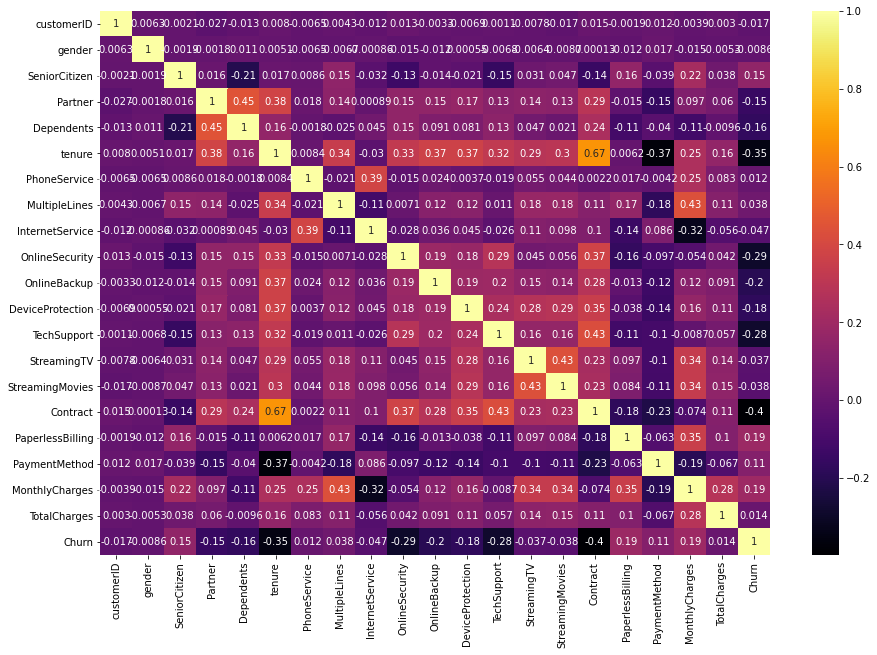

In [16]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor , annot=True,cmap="inferno")

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

calc_vif(df)

,variables,VIF FACTOR
0,customerID,3.564532
1,gender,1.944294
2,SeniorCitizen,1.371725
3,Partner,2.821377
4,Dependents,1.955549
5,tenure,7.705481
6,PhoneService,14.534996
7,MultipleLines,2.759241
8,InternetService,4.370334
9,OnlineSecurity,2.272736


<AxesSubplot:>

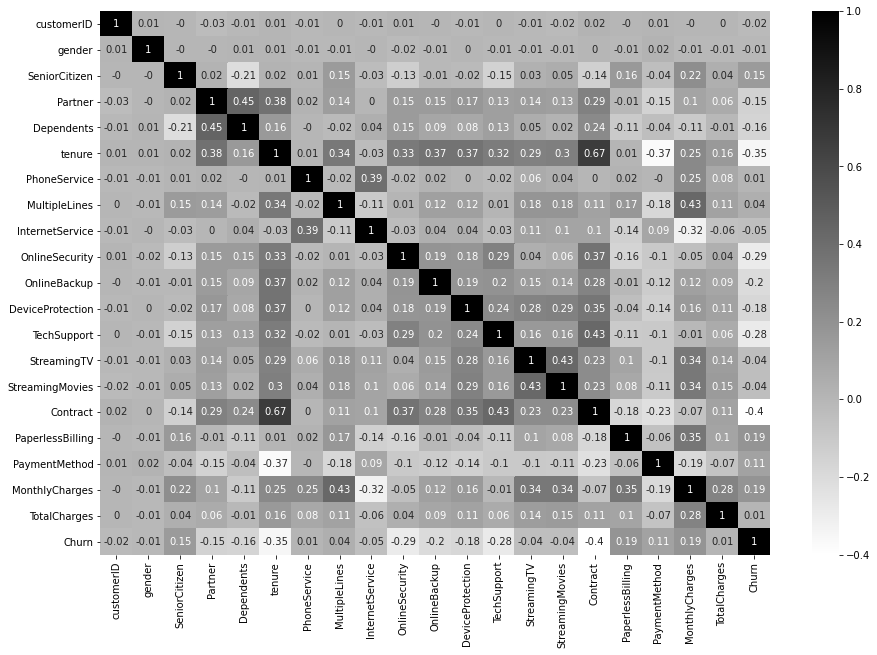

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="binary")

In [20]:
df.shape

(7043, 21)

In [21]:
# splitting  target 
x=df.drop("Churn",axis=1)
y=df["Churn"]


In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)

#note- code running before using PCA 

best accuracy  is  0.7524846190250828 with random state  119


In [23]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=10)

In [26]:
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running After  using PCA 

best accuracy  is  0.751538097491718 with random state  98


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=98)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

DTC=DecisionTreeRegressor()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1595
           1       0.48      0.52      0.50       518

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.74      0.75      2113



In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.77      0.87      0.81      1595
           1       0.31      0.19      0.23       518

    accuracy                           0.70      2113
   macro avg       0.54      0.53      0.52      2113
weighted avg       0.65      0.70      0.67      2113



In [30]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1595
           1       0.00      0.00      0.00       518

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.57      0.75      0.65      2113



In [32]:
from sklearn.tree import DecisionTreeRegressor
    
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc4=classification_report(y_test,pred)
print(acc4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1595
           1       0.48      0.52      0.50       518

    accuracy                           0.75      2113
   macro avg       0.66      0.67      0.67      2113
weighted avg       0.75      0.75      0.75      2113



In [34]:
Observation -
dtc-74
knn-70
svc-75
dt-75

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1595
           1       0.48      0.52      0.50       518

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.74      0.75      2113



In [37]:
# Cross validation
from sklearn.model_selection import cross_val_score
models=(DTC,KNN,SVCc,dt)
for i in models:
    print (i , cross_val_score(i,x,y,cv=7).mean()*100)

DecisionTreeRegressor() -41.55578316521404
KNeighborsClassifier() 68.47918024552361
SVC() 73.46300971303687
DecisionTreeRegressor() -42.04570662597004


In [38]:
# Cross validation
from sklearn.model_selection import cross_val_score
models=(DTC,KNN,SVCc,dt)
for i in models:
    print (i , cross_val_score(i,x,y,cv=15).mean()*100)

DecisionTreeRegressor() -43.602078132235235
KNeighborsClassifier() 68.66382373845063
SVC() 73.4630797380877
DecisionTreeRegressor() -41.538857870359585


In [ ]:
Observation -
CV score is best in  SVC  and the differnce is minimum compared to rest all  so taking svc further for processing 

In [39]:
from sklearn.model_selection import GridSearchCV

parameters={"C":np.arange(1.1,5.5),
            "gamma":["scale","auto"],
            "degree":np.arange(1,30),
           "max_iter":np.arange(1,10)}

GCV=GridSearchCV(SVC(),parameters,cv=15)

In [40]:
SVCc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [41]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=SVC(),
             param_grid={'C': array([1.1, 2.1, 3.1, 4.1, 5.1]),
                         'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'gamma': ['scale', 'auto'],
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [42]:
GCV.best_params_

{'C': 1.1, 'degree': 1, 'gamma': 'scale', 'max_iter': 2}

In [44]:
from sklearn.svm import SVC

Churn_param_model=SVC(C= 1.1, degree= 1, gamma='scale', max_iter= 2)
Churn_param_model.fit(x_train,y_train)
pred=Churn_param_model.predict(x_test)
acc5=classification_report(y_test,pred)
print(acc5)

              precision    recall  f1-score   support

           0       0.75      0.46      0.57      1595
           1       0.24      0.53      0.33       518

    accuracy                           0.47      2113
   macro avg       0.49      0.49      0.45      2113
weighted avg       0.62      0.47      0.51      2113



In [52]:
from sklearn.svm import SVC

Churn_final_model=SVC(probability=True)
Churn_final_model.fit(x_train,y_train)
pred=Churn_final_model.predict(x_test)
accx=classification_report(y_test,pred)
print(accx)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1595
           1       0.00      0.00      0.00       518

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.57      0.75      0.65      2113



In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
pred_y_proba=Churn_final_model.predict_proba(x_test)[:,1]
pred_y_proba

array([0.0678181 , 0.07970616, 0.06945216, ..., 0.17247723, 0.05294409,
       0.07345766])

In [56]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

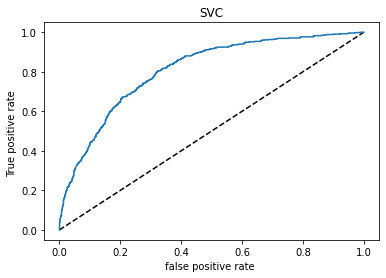

In [58]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label="Test_final_model")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title("SVC")
plt.show()

In [ ]:
#saving best model 
import joblib
joblib.dump(Churn_final_model,"Churn_final_model.pkl")